### 잔차 정규성
- 데이터가 모형 가정을 만족하면 분석결과로 나온 잔차는 정규분포를 따라야 한다.

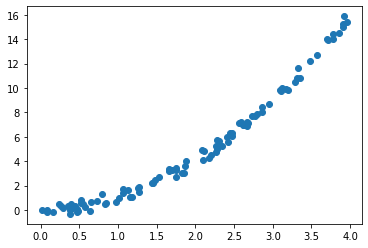

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def make_regression2(n_sample=100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y


x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.show() # 비선형모형

In [5]:
import pandas as pd
import statsmodels.api as sm
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

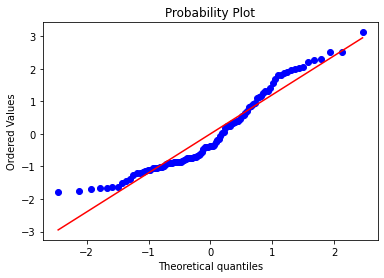

In [7]:
import scipy as sp
sp.stats.probplot(result2.resid, plot=plt)
plt.show() # q-q plot을 보면 정규분포가 아님을 알 수 있다 이유는 비선형적이기 때문

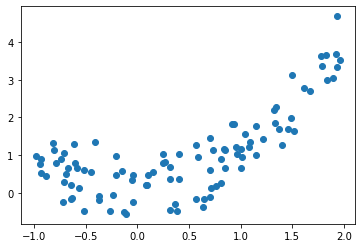

In [9]:
# 그럼 잔차의 분포가 비선형적이면 다 정규분포를 따르지 않는가?
# 정답부터 말하면 정규분포를 따를 수 있다.
def make_regression3(n_sample=100, bias=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y


x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

In [10]:
dfX30 = pd.DataFrame(x3, columns=["X1"])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=["y"])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

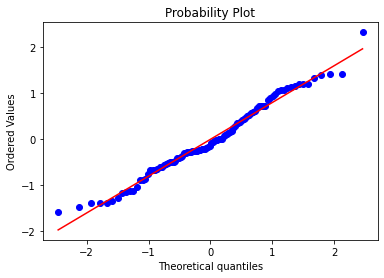

In [11]:
sp.stats.probplot(result3.resid, plot=plt)
plt.show()

In [13]:
test = sm.stats.omni_normtest(result3.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi) # p-value가 54%로 귀무가설 채택

Chi^2       :  1.202
P-value     :  0.548


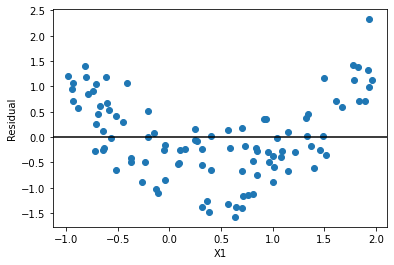

In [14]:
plt.plot(x3, result3.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

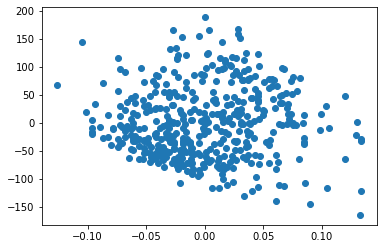

In [17]:
# 이분산성, 등분산성
# 잔차들은 서로 등분산성을 띄어야 한다. (분산이 같아야됨)
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns=["target"])],
               axis=1)
model = sm.OLS.from_formula("target ~ x9", data=df)
result = model.fit()
plt.scatter(df["x9"], result.resid)
plt.show() # 우측으로 갈수록 y값이 퍼짐